<b>Solution by: Bablu</b>

<h3>Question 1: Given some sample data, write a program to answer the following: <a href = 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0'>click here to access the required data set</a></h3>

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
<ol type='a'>
    <li><b>Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.</b>
        <ul>
        <li><i>The naive calculation of AOV ($3145.13) is wrong because it simply takes the mean of <b>"order_amount",i.e., sum of order_amount/number_of_orders (5000)</b>. Which doesn't gives a true picture because of presence of high volume (no. of items in order) orders, which skews the AOV. <b>Therefore, quantity of items in an order(total_items) and amount_per_item (new attribute, = order_amount/total_items) should be taken into account,</b> outliers should be removed with careful analysis.
        </i>
        </li>
        </ul>
    </li>
    <li><b>What metric would you report for this dataset? </b>
        <ul>
        <li><i>After analysing and removing outliers, we get following: </i>
            <li>Order values Mean: $302.5, Median: $284.0, Mode:$153</li>
            <li>amount_per_item values, Mean: $151.79, Median: $153.0, Mode: $153.0.</li>
            <li>total_items values, Mean:1.9947336439133077, Median:2.0, Mode:2</li>
            <li>When total_items per order = 2 (mode) [1816 such orders], order_amount Mean: $303.5, Median:306.0, Mode:306</li>
        </li>
        <li><b>Given above observations, it can be concluded that mean (average) order value $302.5 gives better picture of AOV. Even in case of most frequent orders with "total_item" = 2, the mean order value $303.5 is close to the general mean value ( $302.5).</b>
        </li>
        </ul>
    </li>
    <li>What is its value?
        <ul><li><b>$302.5</b></li>
        </ul>
    </li>


</ol>



In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
sale_df = pd.read_csv(
    "Dataset/2019_Winter_Data_Science_Intern_Challenge_Data_Set.csv")

In [3]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
# function to print current centralities (mean, median, mode) of given attribute (default: "order_amount")
def centralities(dataframe, att: str = 'order_amount'):
    print("{} Mean:{}, Median:{}, Mode:{}".format(
        att, dataframe[att].mean(), dataframe[att].median(), dataframe[att].mode()[0]))

In [5]:
# function to print Box plot of given attribute (default : order_amount)
def boxplot(dataframe, att: str = 'order_amount'):
    if att == 'amount_per_item':
        sns.boxplot(x=dataframe.drop_duplicates(
            subset=["shop_id"], keep="first")["amount_per_item"])
        # sns.boxplot(dataframe["amount_per_item"])
        plt.show()
    else:
        sns.boxplot(x=dataframe[att])
        plt.show()

<p><b>Preprocessing:</b> The data for easier analysis</p>
<ul>
    <li>Transforming <i>"created_at"</i> to Pandas datetime format</li>
    <li>Identifying and removing outliers</li>
</ul>

In [6]:
# changing 'created_at' attribute to date and time attribute, it aid in further analysis
sale_df['created_date'] = pd.to_datetime(sale_df['created_at']).dt.date
sale_df['created_time'] = pd.to_datetime(sale_df['created_at']).dt.time

In [7]:
# Adding new attribute "amount_per_item" = "order_amount" / "total_items"
sale_df["amount_per_item"] = sale_df["order_amount"] / sale_df["total_items"]

In [8]:
# Centralities before outlier detection and removal
centralities(sale_df, 'order_amount')

order_amount Mean:3145.128, Median:284.0, Mode:153


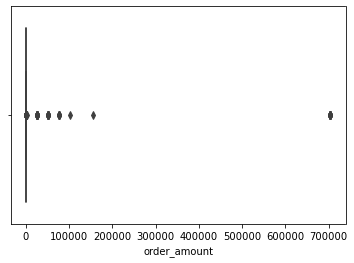

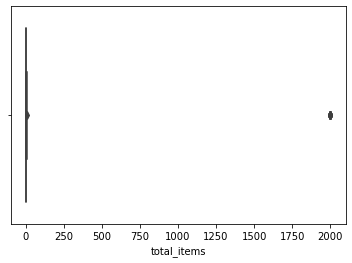

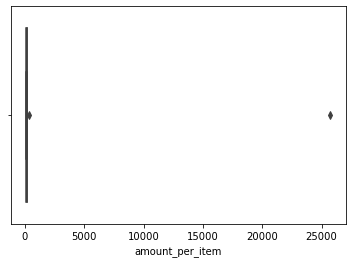

In [9]:
# Outlier identification using Boxplot
boxplot(sale_df, 'order_amount')
boxplot(sale_df, 'total_items')
boxplot(sale_df, "amount_per_item")

<p>In the first box plot (order_amount) it can be observed that, there are significant outliers. They can be B2B orders, or bot orders.</p>
<p>In the second box plot (total_items) the outlier crossponds to the first boxplot, probably it can be a B2B order or bot order.</p>
<p>But for the third box plot (amount_per_item). 
According to the problem statement, sneakers are affordable; but analysing the 'amount_per_item' boxplot clearly shows ambiguity. No way a sneeker costing over 25000 is affordable</p>

In [10]:
# removing outliers according to 3rd boxplot
sale_df[sale_df.amount_per_item > 25000].head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,2017-03-12,05:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,2017-03-26,17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,2017-03-16,21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,2017-03-09,07:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,2017-03-18,11:18:42,25725.0


<b>turns out all those ambigous <i>extremely high amount_per_item</i> orders are from only one shop (shop_id = 78). Total 46 such orders.</b>

order_amount Mean:2717.3677836092047, Median:284.0, Mode:153
amount_per_item Mean:152.47557529269278, Median:153.0, Mode:153.0


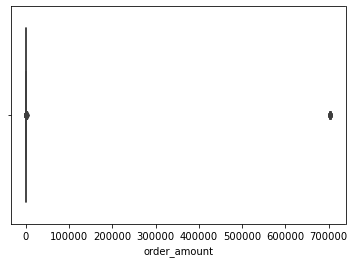

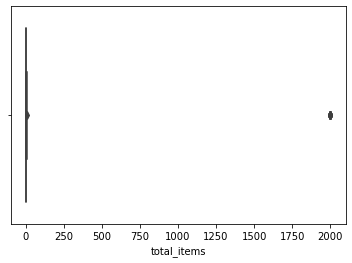

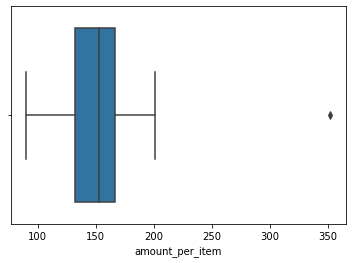

In [11]:
# removing shop_id = 78 from dataset
sale_clean_df = sale_df[sale_df.shop_id != 78]
centralities(sale_clean_df, 'order_amount')
centralities(sale_clean_df, 'amount_per_item')
boxplot(sale_clean_df, 'order_amount')
boxplot(sale_clean_df, 'total_items')
boxplot(sale_clean_df, "amount_per_item")

After removing <i>shop_id = 78,</i> <b>amount_per_item</b> has stablised (mean, median, mode are comparable), also <b>AOV has reduced from 3145.13 to 2717.37</b> but there are still significant outliers as seen in boxplots (order_amount, total_items)

order_amount Mean:302.58051448247926, Median:284.0, Mode:153
amount_per_item Mean:151.7885355479036, Median:153.0, Mode:153.0


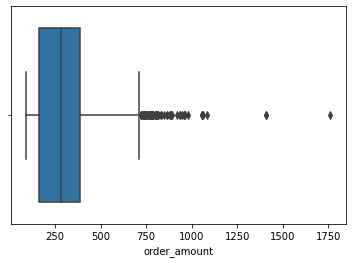

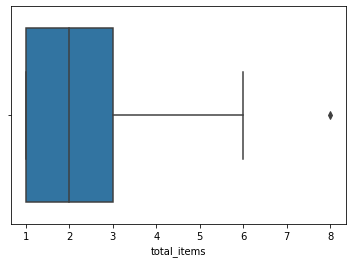

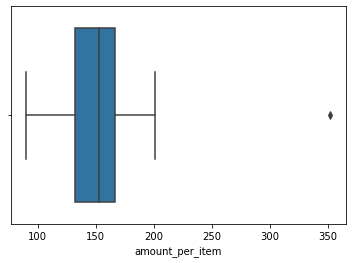

In [12]:
# removing orders with extremely high 'order_amount' based on above boxplot
sale_clean_df = sale_clean_df[sale_clean_df.order_amount < 600000]
centralities(sale_clean_df, 'order_amount')
centralities(sale_clean_df, 'amount_per_item')
boxplot(sale_clean_df, 'order_amount')
boxplot(sale_clean_df, 'total_items')
boxplot(sale_clean_df, "amount_per_item")

After removing data points with extremely high <b>order_amount</b>, <b>AOV has dropped significantly from 2717.37 to 302.58</b> but still significant outliers can be observed in boxplots (order_amount, amount_per_item).

In [13]:
# analysing the orders whose amount_per_item are outlier
sale_clean_df[sale_clean_df.amount_per_item > 300].head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_item
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,2017-03-24,14:15:41,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,2017-03-11,18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,2017-03-04,14:32:58,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,2017-03-25,21:31:25,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15,2017-03-09,14:15:15,352.0


In [14]:
sale_clean_df[sale_clean_df.shop_id == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_item
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,2017-03-24,14:15:41,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,2017-03-11,18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,2017-03-04,14:32:58,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,2017-03-25,21:31:25,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15,2017-03-09,14:15:15,352.0
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,2017-03-13,23:43:45,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:04,2017-03-12,13:09:04,352.0
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21,2017-03-10,06:28:21,352.0
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34,2017-03-13,02:38:34,352.0
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22,2017-03-12,23:00:22,352.0


<p>After analysing the outlier <i>amount_per_item</i>, it is found that only <i>shop (shop_id = 42) </i> is selling expensive sneakers. On close inspection of the orders from this shop, it can be concluded that they are genuine orders. Probably the shop is selling some high-end sneakers. Also exlusion of this shop, doesn't change average order value significantly, so it safe to keep it included.</p>

In [23]:
# Therefore true Mean Order Value is $302.5
centralities(sale_clean_df, 'order_amount')
centralities(sale_clean_df, 'total_items')
centralities(sale_clean_df, 'amount_per_item')

order_amount Mean:302.58051448247926, Median:284.0, Mode:153
total_items Mean:1.9947336439133077, Median:2.0, Mode:2
amount_per_item Mean:151.7885355479036, Median:153.0, Mode:153.0


In [19]:
# checking centralities of orders with total_items = 2, because "2" sneakers is most frequently ordered.
centralities(sale_clean_df[sale_clean_df.total_items == 2], 'order_amount')
centralities(sale_clean_df[sale_clean_df.total_items == 2], 'amount_per_item')
# Even in this isolated case the Mean Order Value doesn't deviate much from the True Mean Order Value.

order_amount Mean:303.52092511013217, Median:306.0, Mode:306
amount_per_item Mean:151.76046255506608, Median:153.0, Mode:153.0


<h3>Question 2: For this question you’ll need to use SQL. <a href ="https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL"> Follow this link to access the data set required for the challenge. </a></h3> Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

<p>a. How many orders were shipped by Speedy Express in total?</p>
<b>54</b>

In [ ]:
SELECT COUNT(*) FROM Orders,Shippers 
WHERE Orders.ShipperID = Shippers.ShipperID AND ShipperName = "Speedy Express";

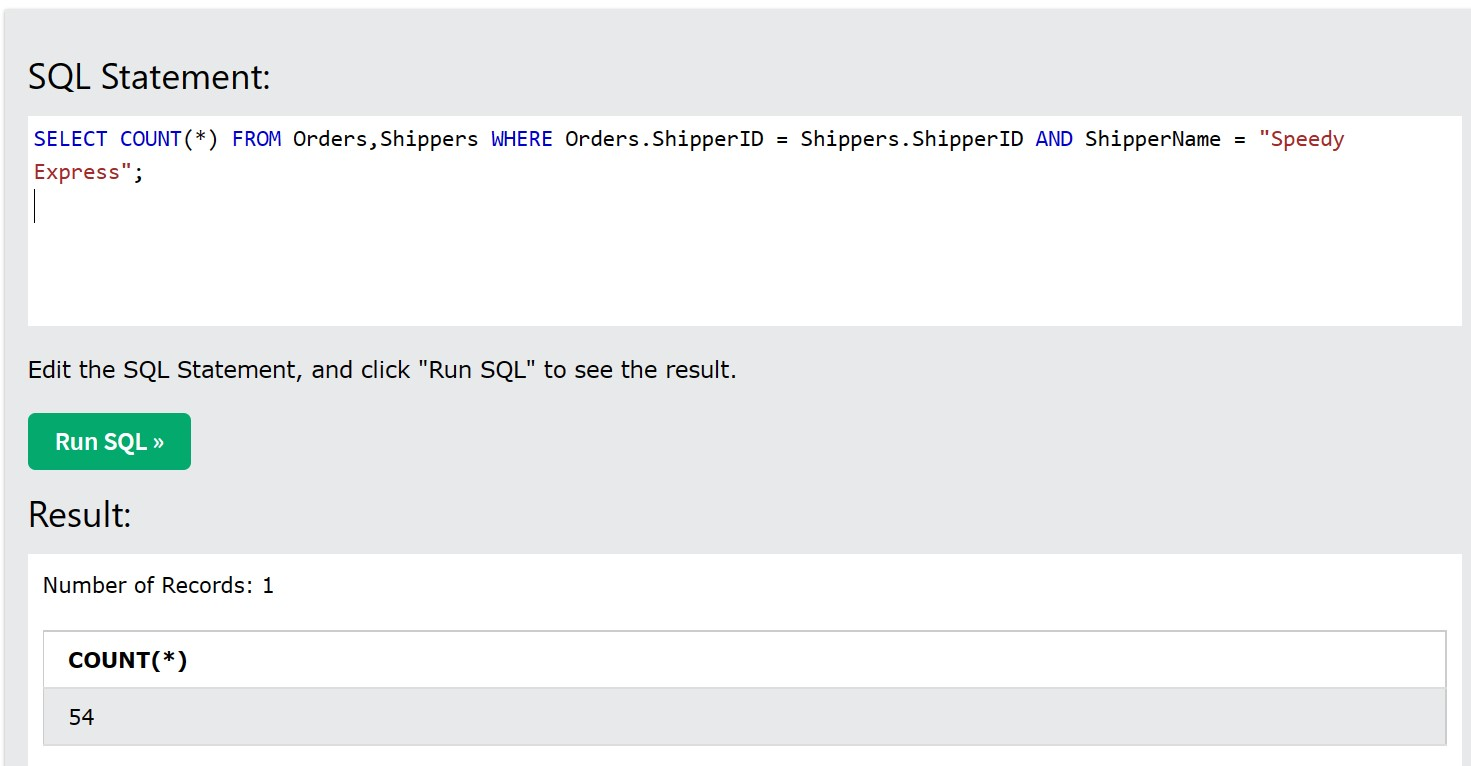

In [3]:
display.Image("Q2.a.jpg")

<p>b. What is the last name of the employee with the most orders?</p>
<b>Peacock</b>

In [ ]:
SELECT LastName FROM Employees, Orders WHERE Employees.EmployeeID = Orders.EmployeeID
GROUP BY Orders.EmployeeID
ORDER BY Count(Employees.EmployeeID) DESC
LIMIT 1;

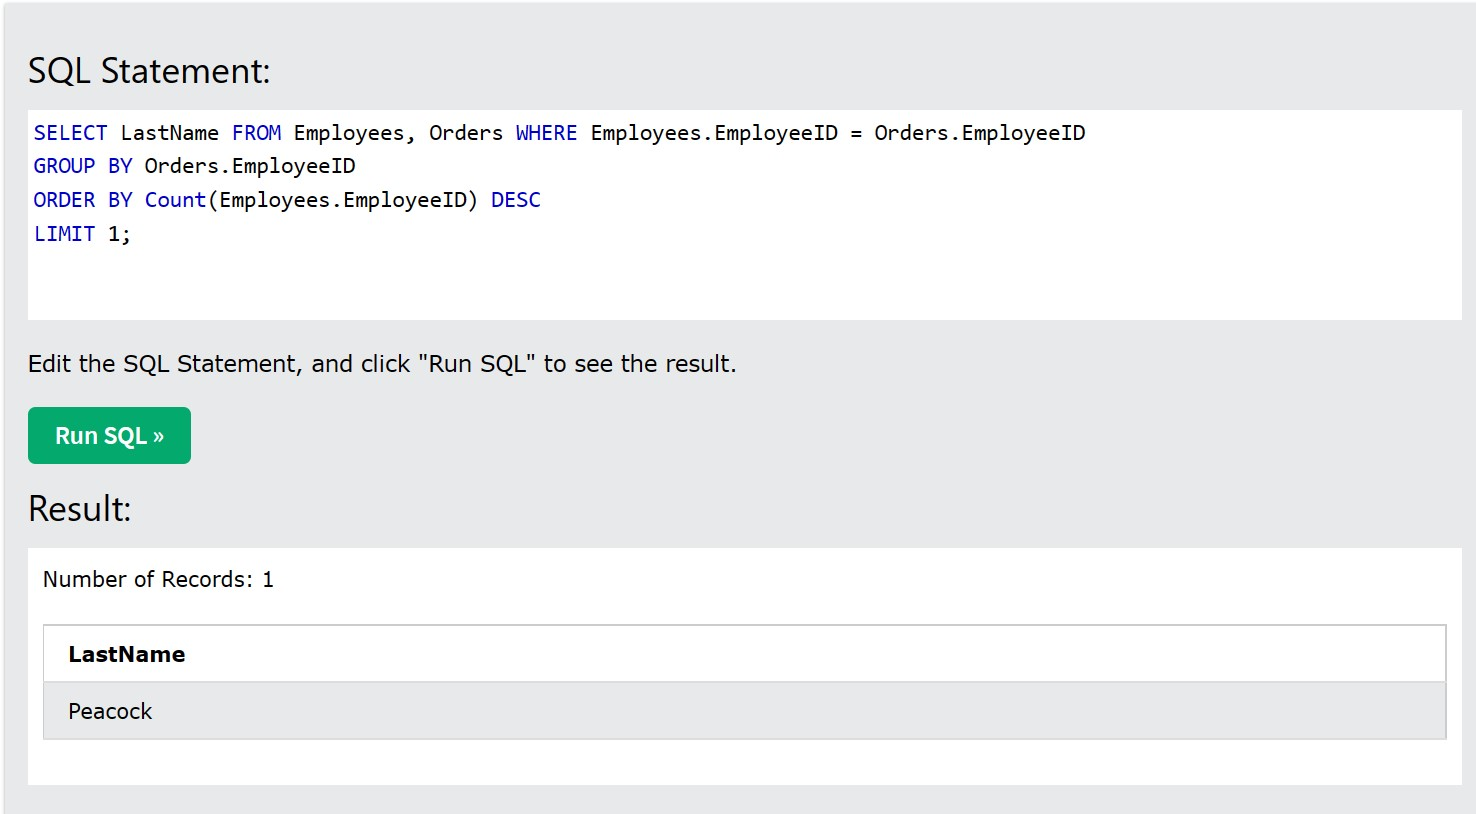

In [4]:
display.Image("Q2.b.jpg")

<p>c. What product was ordered the most by customers in Germany?</p>
<b>Boston Crab Meat</b>

In [ ]:
SELECT prod.ProductName, SUM(det.Quantity) as quan
FROM Products prod JOIN OrderDetails det
ON prod.ProductID = det.ProductID
JOIN Orders Ord
ON det.OrderID = Ord.OrderID
JOIN Customers cus
ON cus.customerID = Ord.customerID
WHERE cus.Country = 'Germany'
GROUP BY prod.productName
ORDER BY quan DESC
LIMIT 1;

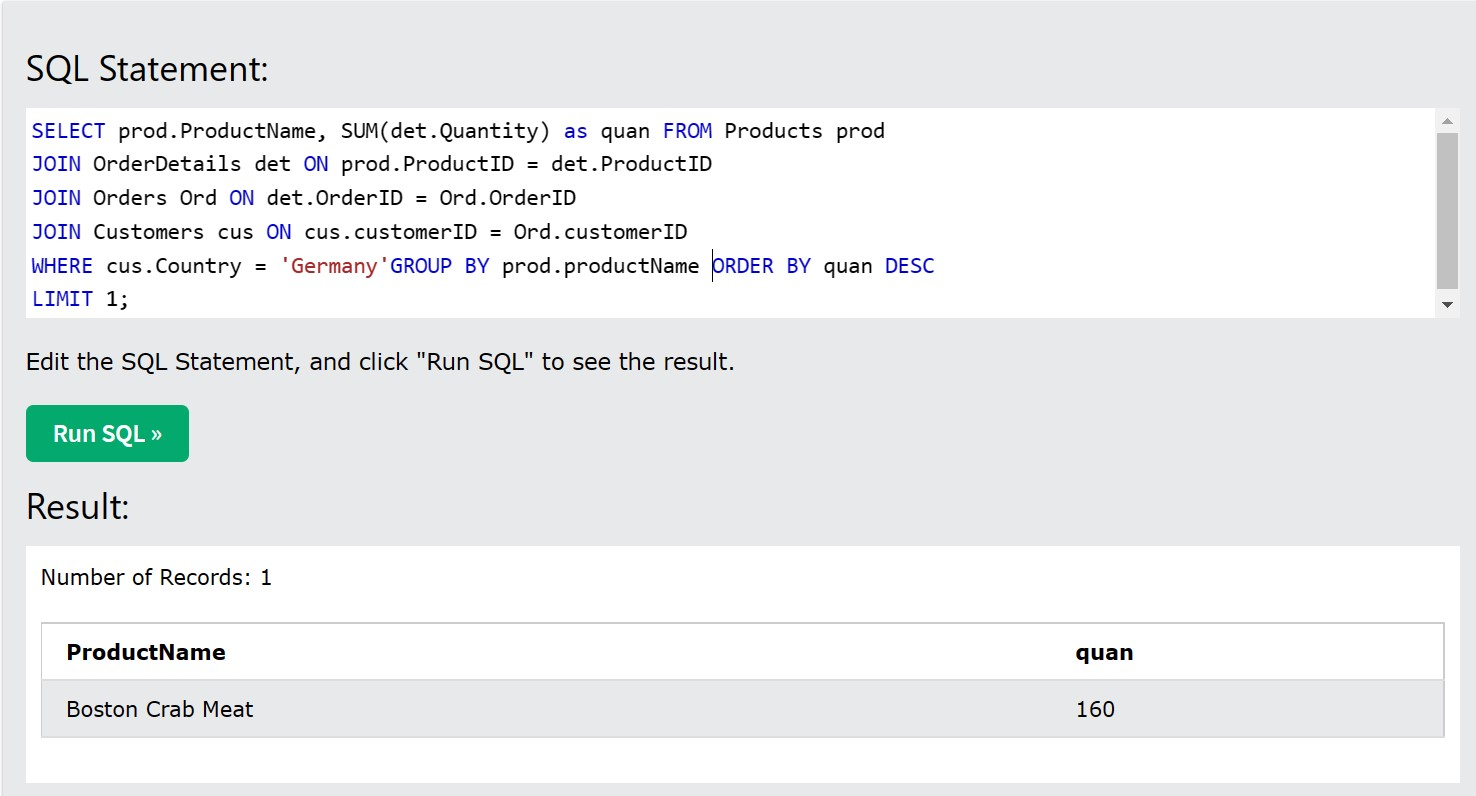

In [5]:
display.Image("Q2.c.jpg")